<a href="https://colab.research.google.com/github/asmaaabdelsattar/instant-training/blob/main/financial_transactions_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# 2. Load datasets
transactions = pd.read_csv("transactions_data.csv")
cards = pd.read_csv("cards_data.csv")
users = pd.read_csv("users_data.csv")

print("Transactions shape:", transactions.shape)
print("Cards shape:", cards.shape)
print("Users shape:", users.shape)


Transactions shape: (2511508, 12)
Cards shape: (6146, 13)
Users shape: (2000, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511508 entries, 0 to 2511507
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 229.9+ MB
None
                 id     client_id       card_id   merchant_id           zip  \
count  2.511508e+06  2.511508e+06  2.511508e+06  2.511508e+06  2.223431e+06   
mean   8.988087e+06  1.029741e+03  3.415695e+03  4.777781e+04  5.147022e+04   
std    8.774477e+05  5.828060e+02  1.677355e+03  2.576900e+04  2.940738e+04   
min    7.475327e+06  0.000000e+00  0.000000e+00  2.000000e+00  1.001000e+03   
25%    8.226942e+

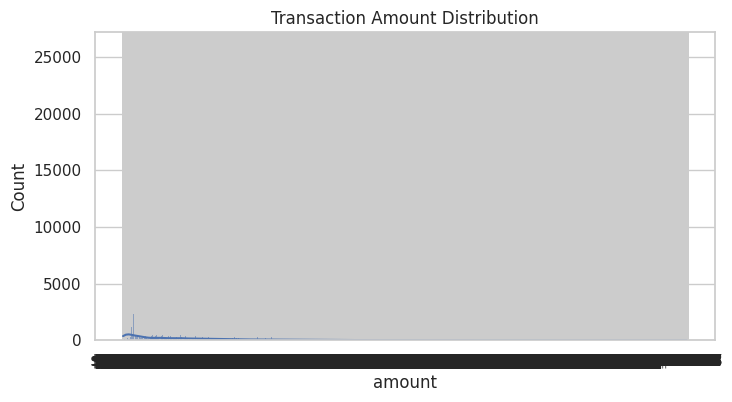

In [2]:
# Summary
print(transactions.info())
print(transactions.describe())

# Missing values
print(transactions.isnull().sum())

# Check transaction amount distribution
plt.figure(figsize=(8,4))
sns.histplot(transactions['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB
None
                id    client_id   card_number          cvv  num_cards_i

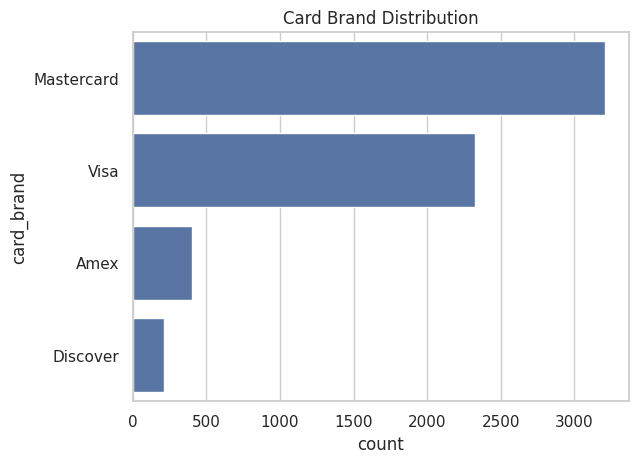

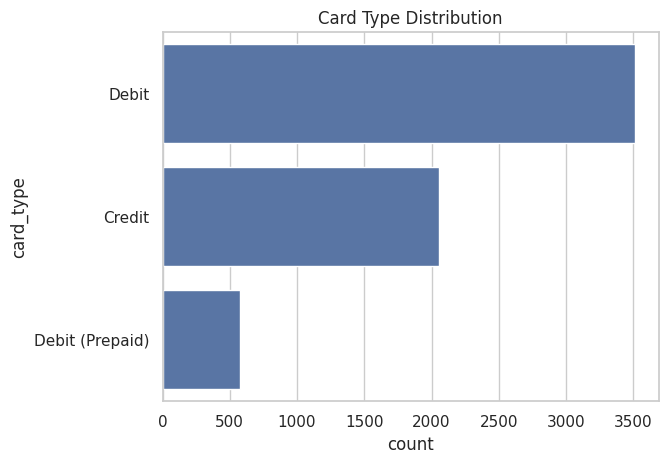

In [3]:
# Summary
print(cards.info())
print(cards.describe())

# Missing values
print(cards.isnull().sum())

# Distribution of card brand/type
if 'card_brand' in cards.columns:
    sns.countplot(y='card_brand', data=cards, order=cards['card_brand'].value_counts().index)
    plt.title("Card Brand Distribution")
    plt.show()

if 'card_type' in cards.columns:
    sns.countplot(y='card_type', data=cards, order=cards['card_type'].value_counts().index)
    plt.title("Card Type Distribution")
    plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\$'
<>:25: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3356928288.py:25: SyntaxWarning: invalid escape sequence '\$'
  users[col] = users[col].replace('[\$,]', '', regex=True).astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB
None
                id  current_age  retirement_age   birth_

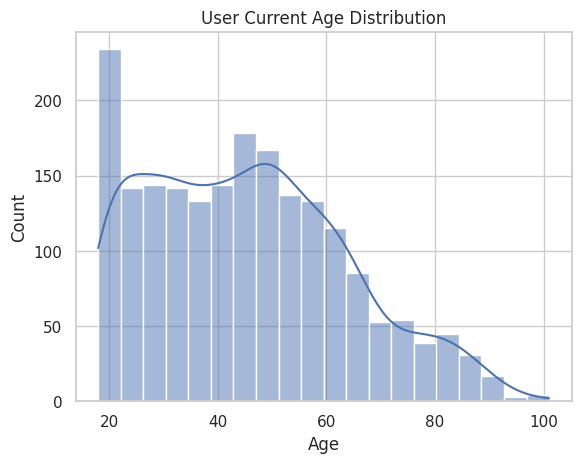

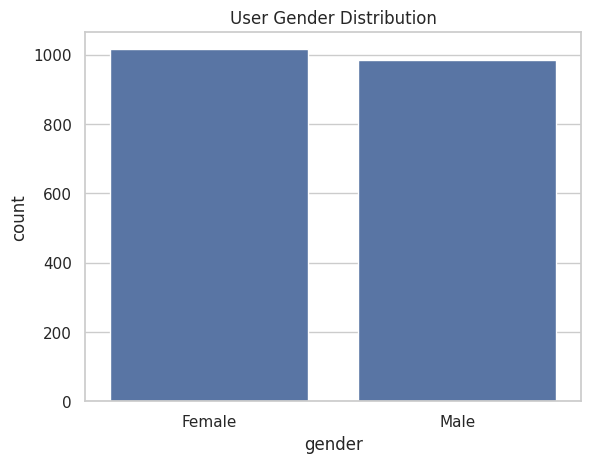

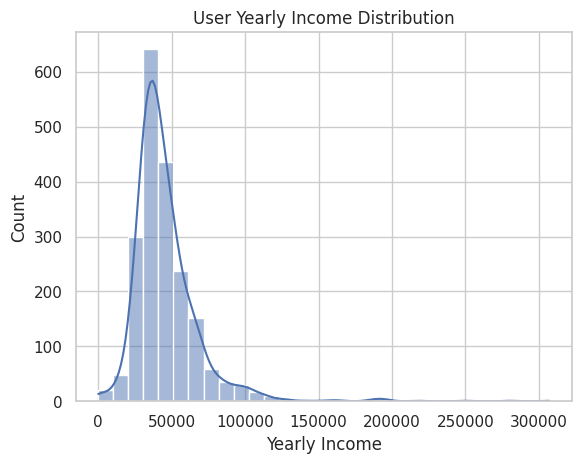

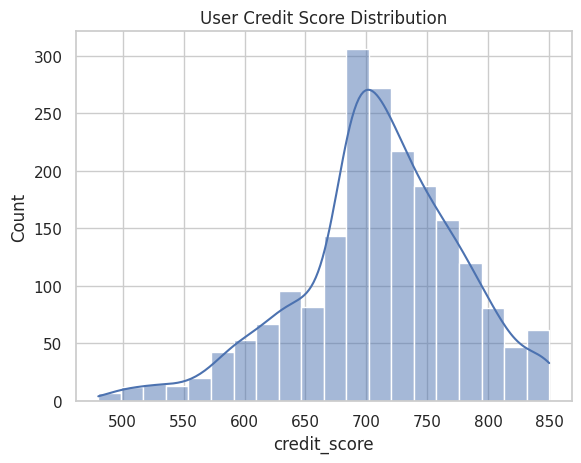

In [4]:
# Summary
print(users.info())
print(users.describe())

# Missing values
print(users.isnull().sum())

# Age distribution
if 'current_age' in users.columns:
    sns.histplot(users['current_age'], bins=20, kde=True)
    plt.title("User Current Age Distribution")
    plt.xlabel("Age")
    plt.show()

# Gender distribution
if 'gender' in users.columns:
    sns.countplot(x='gender', data=users)
    plt.title("User Gender Distribution")
    plt.show()

# Income distribution (after cleaning)
for col in ['per_capita_income', 'yearly_income', 'total_debt']:
    if col in users.columns:
        # Remove currency symbols/commas and convert to float
        users[col] = users[col].replace('[\$,]', '', regex=True).astype(float)

sns.histplot(users['yearly_income'], bins=30, kde=True)
plt.title("User Yearly Income Distribution")
plt.xlabel("Yearly Income")
plt.show()

# Credit score distribution
if 'credit_score' in users.columns:
    sns.histplot(users['credit_score'], bins=20, kde=True)
    plt.title("User Credit Score Distribution")
    plt.show()

In [5]:
# Merge transactions with cards
tx_cards = transactions.merge(cards, on="id", how="left")

# Merge with users
full_data = tx_cards.merge(users, on="id", how="left")

print("Full dataset shape:", full_data.shape)
print(full_data.head())

Full dataset shape: (2511508, 37)
        id                 date  client_id_x  card_id   amount  \
0  7475327  2010-01-01 00:01:00         1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00          561     4575   $14.57   
2  7475329  2010-01-01 00:02:00         1129      102   $80.00   
3  7475331  2010-01-01 00:05:00          430     2860  $200.00   
4  7475332  2010-01-01 00:06:00          848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  client_id_y card_brand card_type  card_number expires  cvv has_chip  \
0

In [6]:
# Standardize IDs
cards = cards.rename(columns={"id": "card_id", "client_id": "user_id"})
users = users.rename(columns={"id": "user_id"})

# Merge correctly
tx_cards = transactions.merge(cards, on="card_id", how="left")
full_data = tx_cards.merge(users, on="user_id", how="left")

print("Final dataset shape:", full_data.shape)
print(full_data.head())

Final dataset shape: (2511508, 37)
        id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  user_id  card_brand        card_type       card_number  expires  \
0    NaN     155

In [7]:
from google.colab import files
full_data.to_csv("merged_dataset.csv", index=False)
files.download("merged_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Convert money columns to numeric
money_cols = ["amount", "credit_limit", "per_capita_income", "yearly_income", "total_debt"]
for col in money_cols:
    if col in full_data.columns:
        full_data[col] = (
            full_data[col]
            .astype(str)
            .str.replace(r"[\$,]", "", regex=True)
            .astype(float)
        )

# Convert date columns
date_cols = ["date", "acct_open_date"]
for col in date_cols:
    if col in full_data.columns:
        full_data[col] = pd.to_datetime(full_data[col], errors="coerce")

print(full_data.head())


        id                date  client_id  card_id  amount           use_chip  \
0  7475327 2010-01-01 00:01:00       1556     2972  -77.00  Swipe Transaction   
1  7475328 2010-01-01 00:02:00        561     4575   14.57  Swipe Transaction   
2  7475329 2010-01-01 00:02:00       1129      102   80.00  Swipe Transaction   
3  7475331 2010-01-01 00:05:00        430     2860  200.00  Swipe Transaction   
4  7475332 2010-01-01 00:06:00        848     3915   46.41  Swipe Transaction   

   merchant_id merchant_city merchant_state      zip   mcc errors  user_id  \
0        59935        Beulah             ND  58523.0  5499    NaN     1556   
1        67570    Bettendorf             IA  52722.0  5311    NaN      561   
2        27092         Vista             CA  92084.0  4829    NaN     1129   
3        27092   Crown Point             IN  46307.0  4829    NaN      430   
4        13051       Harwood             MD  20776.0  5813    NaN      848   

   card_brand        card_type       card_nu

/tmp/ipython-input-2879798262.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_data[col] = pd.to_datetime(full_data[col], errors="coerce")


In [9]:
full_data.describe(include='all')
full_data.isna().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,272215
zip,288077


In [10]:
cols_to_drop = [
    "errors", "zip", "address",
    "card_number", "cvv", "expires"
]
full_data.drop(columns=cols_to_drop, inplace=True)

In [11]:
for col in full_data.select_dtypes(include="object").columns:
    full_data[col] = full_data[col].astype("category")

In [12]:
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511508 entries, 0 to 2511507
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   date                   datetime64[ns]
 2   client_id              int64         
 3   card_id                int64         
 4   amount                 float64       
 5   use_chip               category      
 6   merchant_id            int64         
 7   merchant_city          category      
 8   merchant_state         category      
 9   mcc                    int64         
 10  user_id                int64         
 11  card_brand             category      
 12  card_type              category      
 13  has_chip               category      
 14  num_cards_issued       int64         
 15  credit_limit           float64       
 16  acct_open_date         datetime64[ns]
 17  year_pin_last_changed  int64         
 18  card_on_dark_web      

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,user_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,5499,1556,Mastercard,Debit (Prepaid),YES,2,55.0,2008-05-01,2008,No,30,67,1989,7,Female,46.80,-100.76,23679.0,48277.0,110153.0,740,4
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,5311,561,Mastercard,Credit,YES,1,9100.0,2005-09-01,2015,No,48,67,1971,6,Male,40.80,-91.12,18076.0,36853.0,112139.0,834,5
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,4829,1129,Mastercard,Debit,YES,1,14802.0,2006-01-01,2008,No,49,65,1970,4,Male,33.18,-117.29,16894.0,34449.0,36540.0,686,3
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,4829,430,Mastercard,Debit,NO,2,37634.0,2004-05-01,2006,No,52,67,1967,5,Female,41.42,-87.35,26168.0,53350.0,128676.0,685,5
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,5813,848,Visa,Debit,YES,1,19113.0,2009-07-01,2014,No,51,69,1968,5,Male,38.86,-76.60,33529.0,68362.0,96182.0,711,2


In [13]:
# Add "Unknown" to categories first
full_data['merchant_state'] = full_data['merchant_state'].cat.add_categories(['Unknown'])

# Now safely fill missing values
full_data['merchant_state'] = full_data['merchant_state'].fillna('Unknown')

# Convert year columns to integers
full_data['year_pin_last_changed'] = full_data['year_pin_last_changed'].astype('Int64')
full_data['birth_year'] = full_data['birth_year'].astype('Int64')
full_data['birth_month'] = full_data['birth_month'].astype('Int64')

# Check for negative or zero amounts that could represent refunds or invalids
refunds = full_data[full_data['amount'] < 0]
print(f"Refund/negative transactions: {len(refunds)}")

# Verify all categorical fields are lowercased/consistent
for col in full_data.select_dtypes('category').columns:
    full_data[col] = full_data[col].str.strip().str.title()

Refund/negative transactions: 128620


In [14]:
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511508 entries, 0 to 2511507
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   date                   datetime64[ns]
 2   client_id              int64         
 3   card_id                int64         
 4   amount                 float64       
 5   use_chip               object        
 6   merchant_id            int64         
 7   merchant_city          object        
 8   merchant_state         object        
 9   mcc                    int64         
 10  user_id                int64         
 11  card_brand             object        
 12  card_type              object        
 13  has_chip               object        
 14  num_cards_issued       int64         
 15  credit_limit           float64       
 16  acct_open_date         datetime64[ns]
 17  year_pin_last_changed  Int64         
 18  card_on_dark_web      

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,user_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,Nd,5499,1556,Mastercard,Debit (Prepaid),Yes,2,55.0,2008-05-01,2008,No,30,67,1989,7,Female,46.80,-100.76,23679.0,48277.0,110153.0,740,4
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,Ia,5311,561,Mastercard,Credit,Yes,1,9100.0,2005-09-01,2015,No,48,67,1971,6,Male,40.80,-91.12,18076.0,36853.0,112139.0,834,5
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,Ca,4829,1129,Mastercard,Debit,Yes,1,14802.0,2006-01-01,2008,No,49,65,1970,4,Male,33.18,-117.29,16894.0,34449.0,36540.0,686,3
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,In,4829,430,Mastercard,Debit,No,2,37634.0,2004-05-01,2006,No,52,67,1967,5,Female,41.42,-87.35,26168.0,53350.0,128676.0,685,5
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,Md,5813,848,Visa,Debit,Yes,1,19113.0,2009-07-01,2014,No,51,69,1968,5,Male,38.86,-76.60,33529.0,68362.0,96182.0,711,2


In [15]:
full_data.describe()

,id,date,client_id,card_id,amount,merchant_id,mcc,user_id,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
count,2.511508e+06,2511508,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2511508,2511508.0,2.511508e+06,2.511508e+06,2511508.0,2511508.0,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06,2.511508e+06
mean,8.988087e+06,2011-01-03 04:32:08.261721600,1.029741e+03,3.415695e+03,4.346513e+01,4.777781e+04,5.567154e+03,1.029741e+03,1.530252e+00,1.535687e+04,2006-09-03 13:09:36.187374336,2010.959023,5.467072e+01,6.647226e+01,1964.508929,6.581794,3.735893e+01,-9.164347e+01,2.399218e+04,4.663905e+04,5.732372e+04,7.140313e+02,3.873847e+00
min,7.475327e+06,2010-01-01 00:01:00,0.000000e+00,0.000000e+00,-5.000000e+02,2.000000e+00,1.711000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1991-01-01 00:00:00,2002.0,2.700000e+01,5.300000e+01,1918.0,1.0,2.130000e+01,-1.581800e+02,0.000000e+00,1.000000e+00,0.000000e+00,4.880000e+02,1.000000e+00
25%,8.226942e+06,2010-07-07 11:49:00,5.140000e+02,2.283000e+03,8.980000e+00,2.588700e+04,5.300000e+03,5.140000e+02,1.000000e+00,8.100000e+03,2004-09-01 00:00:00,2009.0,4.300000e+01,6.500000e+01,1955.0,3.0,3.385000e+01,-9.739000e+01,1.710400e+04,3.266900e+04,1.589900e+04,6.840000e+02,3.000000e+00
50%,8.984576e+06,2011-01-05 09:02:30,1.075000e+03,3.474000e+03,2.932000e+01,4.628400e+04,5.499000e+03,1.075000e+03,2.000000e+00,1.334300e+04,2007-06-01 00:00:00,2011.0,5.200000e+01,6.600000e+01,1967.0,7.0,3.835000e+01,-8.661000e+01,2.115900e+04,4.089400e+04,5.153900e+04,7.160000e+02,4.000000e+00
75%,9.748462e+06,2011-07-03 12:14:00,1.534000e+03,4.780000e+03,6.500000e+01,6.757000e+04,5.812000e+03,1.534000e+03,2.000000e+00,2.070000e+04,2009-05-01 00:00:00,2013.0,6.400000e+01,6.800000e+01,1976.0,10.0,4.112000e+01,-8.013000e+01,2.747400e+04,5.401300e+04,8.450700e+04,7.560000e+02,5.000000e+00
max,1.051258e+07,2011-12-26 10:17:00,1.998000e+03,6.065000e+03,6.820200e+03,1.003420e+05,9.402000e+03,1.998000e+03,3.000000e+00,1.413910e+05,2012-07-01 00:00:00,2020.0,1.010000e+02,7.900000e+01,1993.0,12.0,4.853000e+01,-6.867000e+01,1.631450e+05,2.801990e+05,4.618540e+05,8.500000e+02,9.000000e+00
std,8.774477e+05,NaN,5.828060e+02,1.677355e+03,8.340642e+01,2.576900e+04,8.730350e+02,5.828060e+02,5.156668e-01,1.212476e+04,NaN,2.938867,1.551968e+01,3.602949e+00,15.505529,3.604259,5.124907e+00,1.626776e+01,1.204933e+04,2.464214e+04,5.164911e+04,6.563960e+01,1.568601e+00


In [16]:
# Correlation between financial variables
full_data[['yearly_income', 'total_debt', 'credit_limit', 'credit_score']].corr()

,yearly_income,total_debt,credit_limit,credit_score
yearly_income,1.000000,0.495282,0.578191,-0.037199
total_debt,0.495282,1.000000,0.287789,-0.120156
credit_limit,0.578191,0.287789,1.000000,0.018667
credit_score,-0.037199,-0.120156,0.018667,1.000000


In [17]:
# Correlation between financial variables
full_data[['yearly_income', 'total_debt', 'credit_limit', 'credit_score']].corr()

# Average credit score per card type
full_data.groupby('card_type')['credit_score'].mean()

,credit_score
card_type,
Credit,722.255124
Debit,709.682790
Debit (Prepaid),714.890912


,amount
card_brand,
Amex,54.234338
Discover,53.031173
Mastercard,40.620964
Visa,44.889974


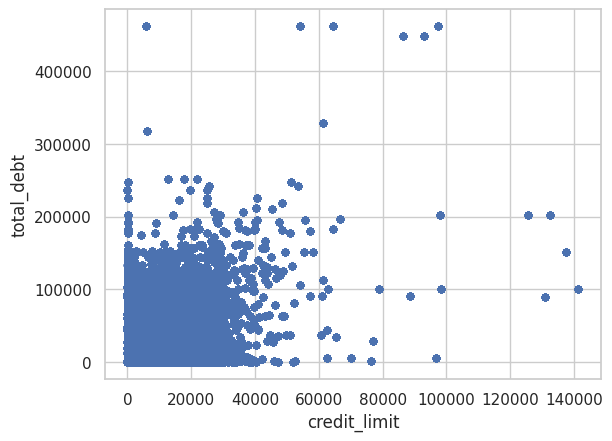

In [18]:
# Relationship between credit limit and total debt
full_data.plot.scatter(x='credit_limit', y='total_debt', alpha=0.3)

# Average transaction amount per card brand
full_data.groupby('card_brand')['amount'].mean()

In [19]:
# Spending patterns by gender
full_data.groupby('gender')['amount'].mean()

,amount
gender,
Female,43.404873
Male,43.527620


In [20]:
# Top 10 users with highest total spending
top_users = full_data.groupby('user_id')['amount'].sum().sort_values(ascending=False).head(10)
print("Top spending users:\n", top_users)

Top spending users:
 user_id
96      511471.03
1686    436190.45
1340    413882.06
840     396330.86
464     378491.97
490     369169.26
488     326984.37
285     325237.47
989     317114.10
704     315833.48
Name: amount, dtype: float64


<Axes: xlabel='month'>

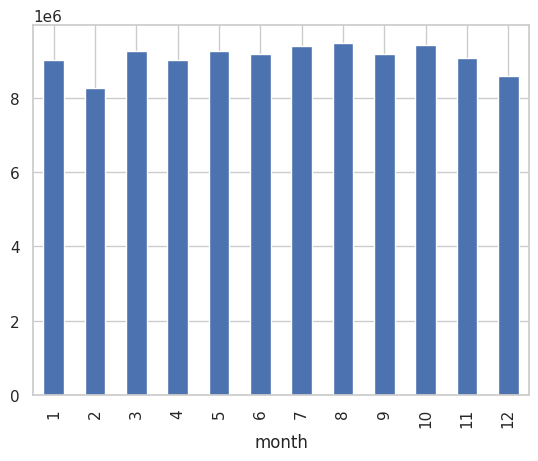

In [21]:
# Total transaction amount by month
full_data['month'] = full_data['date'].dt.month
full_data.groupby('month')['amount'].sum().plot(kind='bar')

In [22]:
full_data['date'].min(), full_data['date'].max()

(Timestamp('2010-01-01 00:01:00'), Timestamp('2011-12-26 10:17:00'))

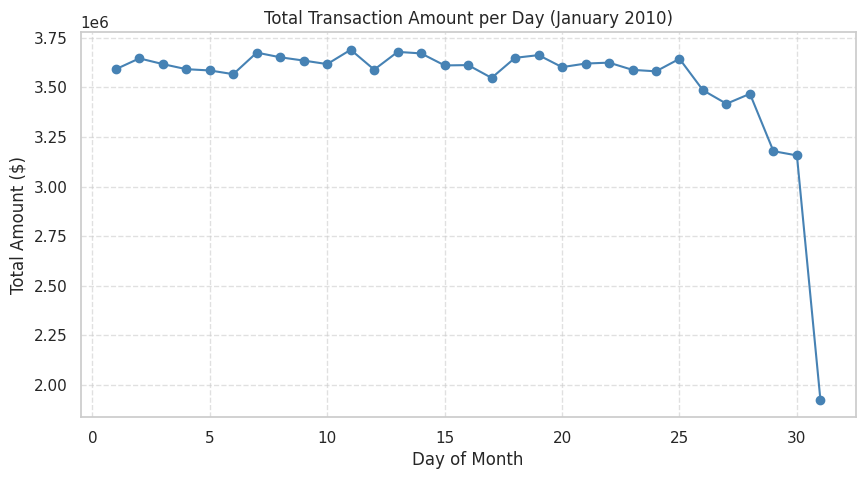

In [23]:
# Group by day and sum transaction amounts
daily_trend = full_data.groupby(full_data['date'].dt.day)['amount'].sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(daily_trend.index, daily_trend.values, marker='o', color='steelblue')
plt.title('Total Transaction Amount per Day (January 2010)')
plt.xlabel('Day of Month')
plt.ylabel('Total Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [24]:
# Fraud by card brand
if 'label' in full_data.columns and 'card_brand' in full_data.columns:
    fraud_by_brand = full_data.groupby('card_brand')['label'].mean().sort_values(ascending=False)
    print(fraud_by_brand)

    fraud_by_brand.plot(kind='bar', figsize=(8,4))
    plt.title("Fraud Rate by Card Brand")
    plt.ylabel("Fraud Rate")
    plt.show()

# Fraud by age group
if 'label' in full_data.columns and 'age' in full_data.columns:
    full_data['age_group'] = pd.cut(full_data['age'], bins=[18,25,35,50,70,100],
                                    labels=['18-25','26-35','36-50','51-70','70+'])
    fraud_by_age = full_data.groupby('age_group')['label'].mean()
    fraud_by_age.plot(kind='bar', figsize=(8,4))
    plt.title("Fraud Rate by User Age Group")
    plt.ylabel("Fraud Rate")
    plt.show()

# Fraud by transaction amount
if 'label' in full_data.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='label', y='amount', data=full_data)
    plt.ylim(0, full_data['amount'].quantile(0.95))  # focus on 95th percentile
    plt.title("Transaction Amount by Fraud Label")
    plt.show()


# Cards with most fraudulent transactions
if 'label' in full_data.columns:
    risky_cards = full_data.groupby('card_id')['label'].mean().sort_values(ascending=False).head(10)
    print("Most risky cards:\n", risky_cards)

/tmp/ipython-input-2077965863.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_spending, x='amount', y='merchant_city', palette='Blues_r')


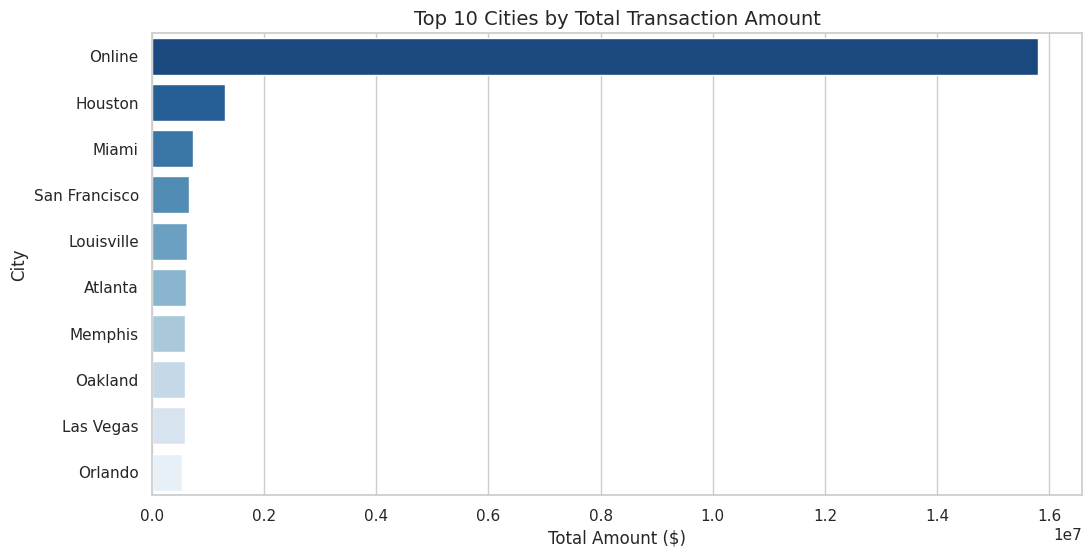

In [25]:
# Group by city and sum amounts
city_spending = (
    full_data.groupby('merchant_city')['amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=city_spending, x='amount', y='merchant_city', palette='Blues_r')
plt.title('Top 10 Cities by Total Transaction Amount', fontsize=14)
plt.xlabel('Total Amount ($)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

/tmp/ipython-input-2325414959.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=card_type_avg, x='card_type', y='amount', palette='viridis')


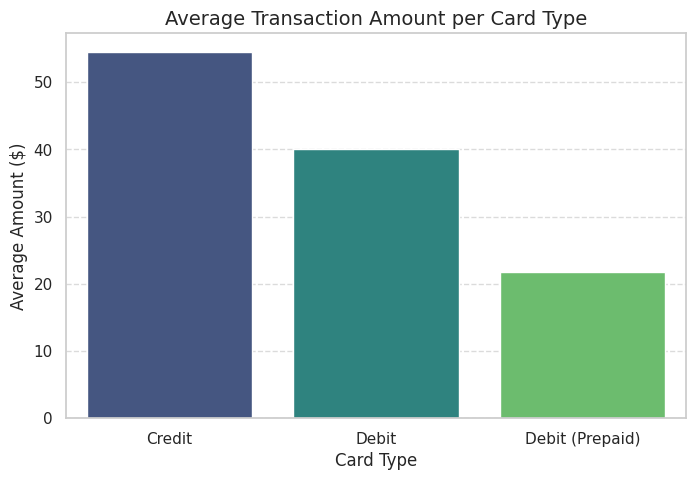

In [26]:
# Average transaction amount per card type
card_type_avg = (
    full_data.groupby('card_type')['amount']
    .mean()
    .reset_index()
    .sort_values(by='amount', ascending=False)
)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=card_type_avg, x='card_type', y='amount', palette='viridis')
plt.title('Average Transaction Amount per Card Type', fontsize=14)
plt.xlabel('Card Type')
plt.ylabel('Average Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


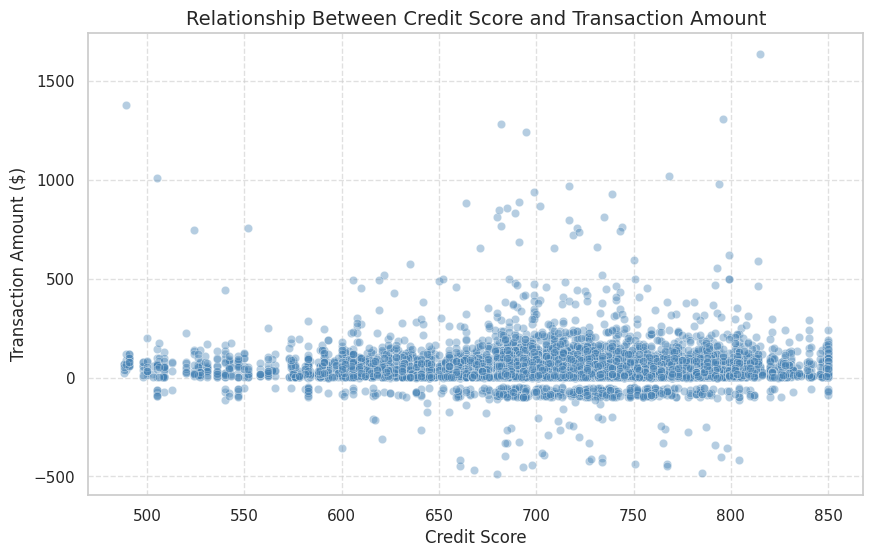

Correlation between credit_score and amount: -0.010


In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=full_data.sample(10000, random_state=42),  # sample for speed/clarity
    x='credit_score',
    y='amount',
    alpha=0.4,
    color='steelblue'
)
plt.title('Relationship Between Credit Score and Transaction Amount', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Transaction Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Correlation
corr = full_data[['credit_score', 'amount']].corr().iloc[0,1]
print(f"Correlation between credit_score and amount: {corr:.3f}")


/tmp/ipython-input-378370902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['credit_score_category'] = pd.cut(df_filtered['credit_score'], bins=bins, labels=labels)


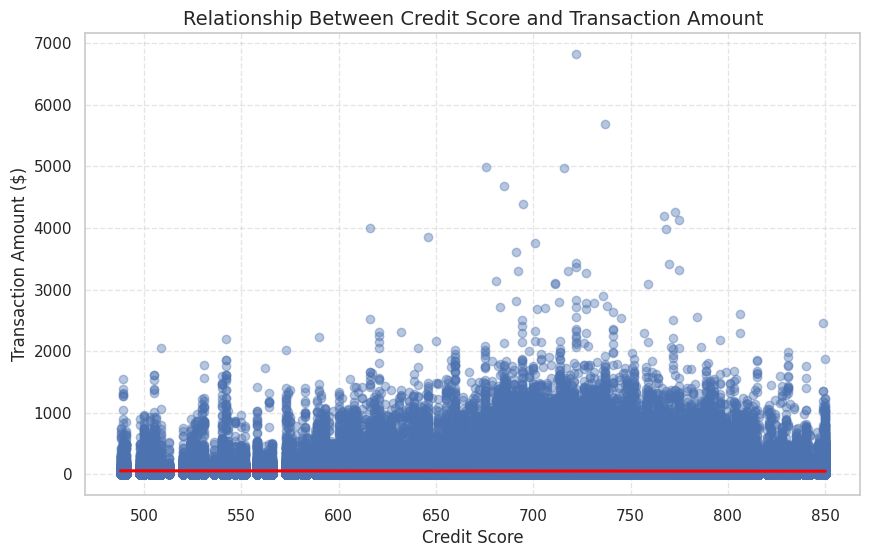

/tmp/ipython-input-378370902.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_score = df_filtered.groupby('credit_score_category')['amount'].mean().reset_index()
/tmp/ipython-input-378370902.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='credit_score_category', y='amount', data=avg_by_score, palette='viridis')


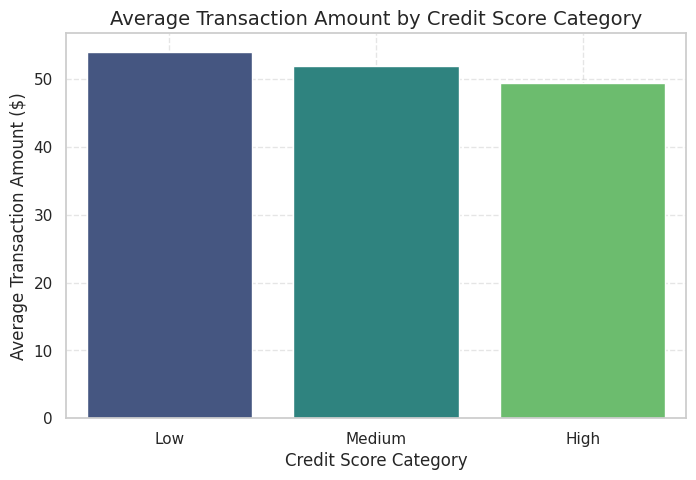

In [28]:
# Make sure credit_score and amount exist in your dataframe
df = full_data

# Optional: remove refunds or negative amounts for clarity
df_filtered = df[df['amount'] > 0]

# Create credit score categories
bins = [0, 600, 750, 850]
labels = ['Low', 'Medium', 'High']
df_filtered['credit_score_category'] = pd.cut(df_filtered['credit_score'], bins=bins, labels=labels)

#Scatter plot with regression line ---
plt.figure(figsize=(10, 6))
sns.regplot(x='credit_score', y='amount', data=df_filtered, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship Between Credit Score and Transaction Amount', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Transaction Amount ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#Average transaction per credit score category ---
avg_by_score = df_filtered.groupby('credit_score_category')['amount'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='credit_score_category', y='amount', data=avg_by_score, palette='viridis')
plt.title('Average Transaction Amount by Credit Score Category', fontsize=14)
plt.xlabel('Credit Score Category')
plt.ylabel('Average Transaction Amount ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Outlier threshold: 322.93
Number of outlier transactions: 25116


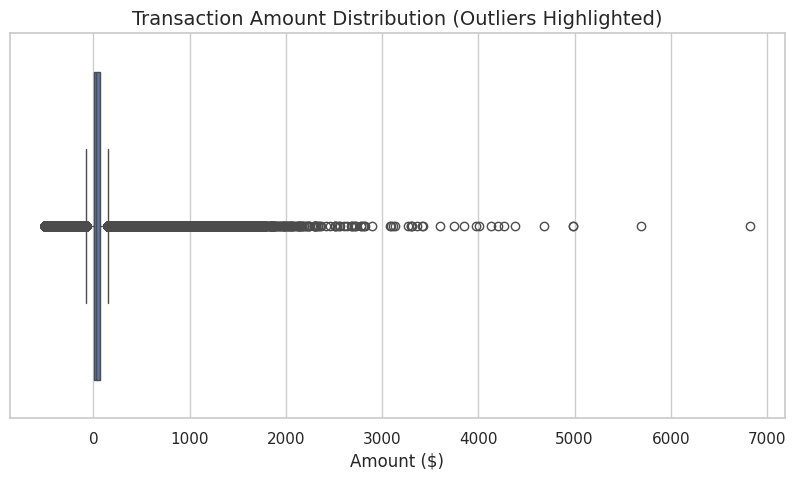

In [29]:
# Detect transactions larger than 99th percentile
threshold = full_data['amount'].quantile(0.99)
outliers = full_data[full_data['amount'] > threshold]

print(f"Outlier threshold: {threshold:.2f}")
print(f"Number of outlier transactions: {len(outliers)}")

plt.figure(figsize=(10,5))
sns.boxplot(x=full_data['amount'])
plt.title('Transaction Amount Distribution (Outliers Highlighted)', fontsize=14)
plt.xlabel('Amount ($)')
plt.show()


In [30]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Extract potential outliers
outliers = df[(df['amount'] < lower_limit) | (df['amount'] > upper_limit)]
print(f"Number of potential outliers: {len(outliers)}")
outliers.head()


Number of potential outliers: 193935


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,mcc,user_id,card_brand,card_type,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,month
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,Nd,5499,1556,Mastercard,Debit (Prepaid),Yes,2,55.0,2008-05-01,2008,No,30,67,1989,7,Female,46.80,-100.76,23679.0,48277.0,110153.0,740,4,1
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,In,4829,430,Mastercard,Debit,No,2,37634.0,2004-05-01,2006,No,52,67,1967,5,Female,41.42,-87.35,26168.0,53350.0,128676.0,685,5,1
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,Online,Unknown,7801,335,Visa,Debit,Yes,1,23401.0,2008-10-01,2011,No,46,68,1973,7,Female,26.74,-80.12,27696.0,56467.0,66565.0,688,3,1
28,7475358,2010-01-01 00:48:00,401,3004,669.88,Swipe Transaction,68977,West Covina,Ca,3174,401,Mastercard,Debit,Yes,1,17691.0,2009-05-01,2009,No,81,71,1938,9,Male,34.20,-118.39,15239.0,28644.0,879.0,806,7,1
35,7475365,2010-01-01 01:01:00,820,127,270.22,Online Transaction,73186,Online,Unknown,4814,820,Mastercard,Debit,Yes,1,20759.0,2007-01-01,2009,No,70,59,1949,12,Female,41.70,-70.30,26762.0,41902.0,29713.0,633,5,1


In [31]:
# Count transactions per card
tx_per_card = full_data.groupby('card_id')['id'].count().reset_index(name='num_transactions')

# Find cards with abnormally high activity
threshold_tx = tx_per_card['num_transactions'].quantile(0.99)
frequent_cards = tx_per_card[tx_per_card['num_transactions'] > threshold_tx]

print(f"Cards with unusually high activity: {len(frequent_cards)}")
frequent_cards.head()


Cards with unusually high activity: 32


,card_id,num_transactions
326,1070,3673
372,1126,3458
373,1127,4853
453,1224,3227
471,1247,3486


In [32]:
import json
import pandas as pd

train_fraud_labels = pd.read_json("train_fraud_labels.json", lines=True)
train_fraud_labels.head()
train_fraud_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [33]:
# Extract the dictionary inside the 'target' column
fraud_dict = train_fraud_labels["target"].iloc[0]

# Convert it to a DataFrame
fraud_df = pd.DataFrame(list(fraud_dict.items()), columns=["transaction_id", "is_fraud"])

# Convert to correct datatypes
fraud_df["transaction_id"] = fraud_df["transaction_id"].astype(str)
fraud_df["is_fraud"] = fraud_df["is_fraud"].map({"Yes": 1, "No": 0})

# Merge with your main dataset (assuming it has a column named 'id')
# Ensure both are strings before merging
full_data["id"] = full_data["id"].astype(str)
fraud_df["transaction_id"] = fraud_df["transaction_id"].astype(str)

# Now merge safely
merged_data = full_data.merge(fraud_df, left_on="id", right_on="transaction_id", how="left")


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
# Make sure the 'id' column in full_data is a string to match transaction_id
full_data["id"] = full_data["id"].astype(str)

# Merge fraud labels with your main dataset
merged_data = full_data.merge(fraud_df, left_on="id", right_on="transaction_id", how="left")

# Replace NaN (unlabeled) with 0 (not fraud)
merged_data["is_fraud"] = merged_data["is_fraud"].fillna(0).astype(int)

# Drop the duplicate column
merged_data.drop(columns=["transaction_id"], inplace=True)

# Check results
merged_data["is_fraud"].value_counts()


,count
is_fraud,
0,2508898
1,2610


In [36]:
# Number of unique labeled transactions
print("Unique fraud label IDs:", fraud_df["transaction_id"].nunique())

# How many of these exist in full_data
print("Matching IDs in full_data:", sum(fraud_df["transaction_id"].isin(full_data["id"].astype(str))))


Unique fraud label IDs: 8914963
Matching IDs in full_data: 1681453


In [37]:
print(full_data.columns.tolist())


['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city', 'merchant_state', 'mcc', 'user_id', 'card_brand', 'card_type', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date', 'year_pin_last_changed', 'card_on_dark_web', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'month']


In [38]:
# Step 1: Read file content safely
with open("train_fraud_labels.json", "r") as file:
    raw_data = file.read()

# Display a small part to see its structure
print(raw_data[:500])


{"target": {"10649266": "No", "23410063": "No", "9316588": "No", "12478022": "No", "9558530": "No", "12532830": "No", "19526714": "No", "9906964": "No", "13224888": "No", "13749094": "No", "12303776": "No", "19480376": "No", "11716050": "No", "20025400": "No", "7661688": "No", "16662807": "No", "21419778": "No", "18011186": "No", "23289598": "No", "11644547": "No", "23235120": "No", "19748218": "No", "8720720": "No", "18335831": "No", "18936727": "No", "15223870": "No", "12370203": "No", "171266


In [39]:
import json

# Fix single quotes and convert to valid JSON
cleaned_data = raw_data.replace("'", '"')

# Now parse it
fraud_dict = json.loads(cleaned_data)


In [40]:
fraud_df.head(10)


,transaction_id,is_fraud
0,10649266,0
1,23410063,0
2,9316588,0
3,12478022,0
4,9558530,0
5,12532830,0
6,19526714,0
7,9906964,0
8,13224888,0
9,13749094,0


In [41]:
fraud_dict = fraud_df["is_fraud"].iloc[0]  # or fraud_df["target"].iloc[0] depending on the column name


In [42]:
type(fraud_dict), fraud_dict



(numpy.int64, np.int64(0))

In [43]:
print(raw_data[:1000])


{"target": {"10649266": "No", "23410063": "No", "9316588": "No", "12478022": "No", "9558530": "No", "12532830": "No", "19526714": "No", "9906964": "No", "13224888": "No", "13749094": "No", "12303776": "No", "19480376": "No", "11716050": "No", "20025400": "No", "7661688": "No", "16662807": "No", "21419778": "No", "18011186": "No", "23289598": "No", "11644547": "No", "23235120": "No", "19748218": "No", "8720720": "No", "18335831": "No", "18936727": "No", "15223870": "No", "12370203": "No", "17126661": "No", "22270430": "No", "18790248": "No", "20143410": "No", "9497252": "No", "17619208": "No", "11052664": "No", "14670204": "No", "17681877": "No", "22485981": "No", "22332853": "No", "16628447": "No", "7766832": "No", "7614276": "No", "14069486": "No", "13755628": "No", "17306332": "No", "19822702": "No", "19118845": "No", "12799754": "No", "17368331": "No", "23652500": "No", "14024256": "No", "12296764": "No", "16044038": "No", "22500112": "No", "12343484": "No", "15796886": "No", "23508

In [44]:
import json
import pandas as pd

# Step 1: Read the JSON file
with open("train_fraud_labels.json", "r") as file:
    fraud_data = json.load(file)

# Step 2: Extract the 'target' dictionary
fraud_dict = fraud_data["target"]

# Step 3: Convert to DataFrame
fraud_df = pd.DataFrame(list(fraud_dict.items()), columns=["transaction_id", "is_fraud"])

# Step 4: Convert 'Yes'/'No' to numeric if you like (optional)
fraud_df["is_fraud"] = fraud_df["is_fraud"].map({"Yes": 1, "No": 0})

# Step 5: Convert IDs to integers for merging
fraud_df["transaction_id"] = fraud_df["transaction_id"].astype(int)

fraud_df.head()


,transaction_id,is_fraud
0,10649266,0
1,23410063,0
2,9316588,0
3,12478022,0
4,9558530,0


In [45]:
# Ensure both columns have the same type
full_data["id"] = full_data["id"].astype(int)

# Merge fraud labels into main data
merged_data = full_data.merge(fraud_df, left_on="id", right_on="transaction_id", how="left")

# Replace NaN fraud labels (no match found) with 0 (not fraudulent)
merged_data["is_fraud"] = merged_data["is_fraud"].fillna(0).astype(int)

# Drop the extra transaction_id column
merged_data = merged_data.drop(columns=["transaction_id"])

# Quick check
merged_data["is_fraud"].value_counts()


,count
is_fraud,
0,2508898
1,2610


In [46]:
fraud_df["is_fraud"] = fraud_df["is_fraud"].map({"Yes": 1, "No": 0})
fraud_df["transaction_id"] = fraud_df["transaction_id"].astype(int)


In [47]:
fraud_df.info()
fraud_df["is_fraud"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column          Dtype  
---  ------          -----  
 0   transaction_id  int64  
 1   is_fraud        float64
dtypes: float64(1), int64(1)
memory usage: 136.0 MB


,count
is_fraud,


In [48]:
fraud_counts = merged_data["is_fraud"].value_counts(normalize=True) * 100
print("Fraud Distribution (%):\n", fraud_counts)

Fraud Distribution (%):
 is_fraud
0    99.896078
1     0.103922
Name: proportion, dtype: float64


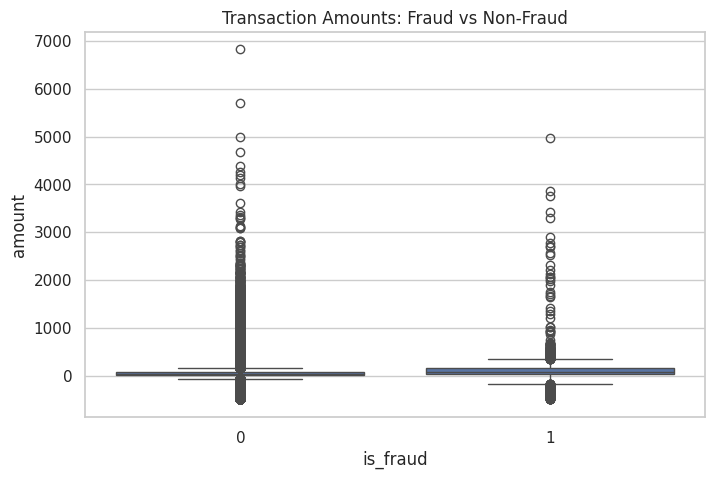

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fraud vs non-fraud by amount
plt.figure(figsize=(8,5))
sns.boxplot(x="is_fraud", y="amount", data=merged_data)
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.show()



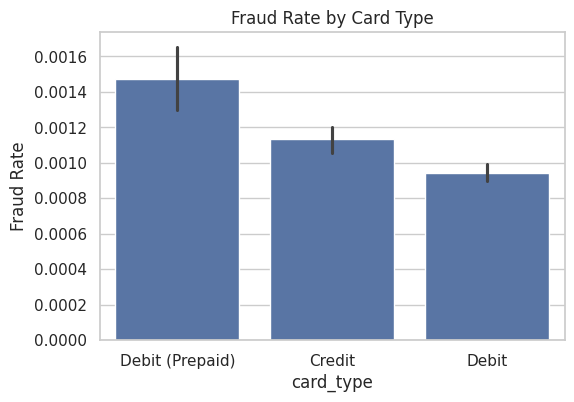

In [50]:
# Fraud rate by card type
plt.figure(figsize=(6,4))
sns.barplot(x="card_type", y="is_fraud", data=merged_data, estimator=lambda x: sum(x)/len(x))
plt.title("Fraud Rate by Card Type")
plt.ylabel("Fraud Rate")
plt.show()

In [51]:
fraud_by_state = merged_data.groupby("merchant_state")["is_fraud"].mean().sort_values(ascending=False).head(10)
print(fraud_by_state)

merchant_state
Tuvalu       1.000000
Haiti        0.676471
Unknown      0.008640
Algeria      0.000000
Aa           0.000000
Ak           0.000000
Al           0.000000
Aruba        0.000000
Australia    0.000000
Austria      0.000000
Name: is_fraud, dtype: float64


In [52]:
# Transactions above the 99th percentile
threshold = merged_data["amount"].quantile(0.99)
high_value_tx = merged_data[merged_data["amount"] > threshold]
print("High-value suspicious transactions:", len(high_value_tx))

High-value suspicious transactions: 25116


In [53]:
tx_per_card = merged_data["card_id"].value_counts()
print("Cards with unusually high transaction counts:")
print(tx_per_card.head(10))

Cards with unusually high transaction counts:
card_id
4938    7920
2408    7597
3239    5999
3233    5607
3801    5221
1127    4853
3398    4450
5413    4426
3267    4305
2040    4050
Name: count, dtype: int64


In [54]:
corr = merged_data.corr(numeric_only=True)["is_fraud"].sort_values(ascending=False)
print(corr)

is_fraud                 1.000000
amount                   0.029520
merchant_id              0.005857
num_credit_cards         0.002208
retirement_age           0.001685
current_age              0.001527
client_id                0.000883
user_id                  0.000883
birth_month              0.000564
latitude                 0.000048
card_id                 -0.000152
credit_score            -0.000311
total_debt              -0.000906
num_cards_issued        -0.001005
birth_year              -0.001537
month                   -0.001927
yearly_income           -0.002574
per_capita_income       -0.002627
longitude               -0.004009
credit_limit            -0.004082
year_pin_last_changed   -0.004462
mcc                     -0.017797
id                      -0.028676
Name: is_fraud, dtype: float64


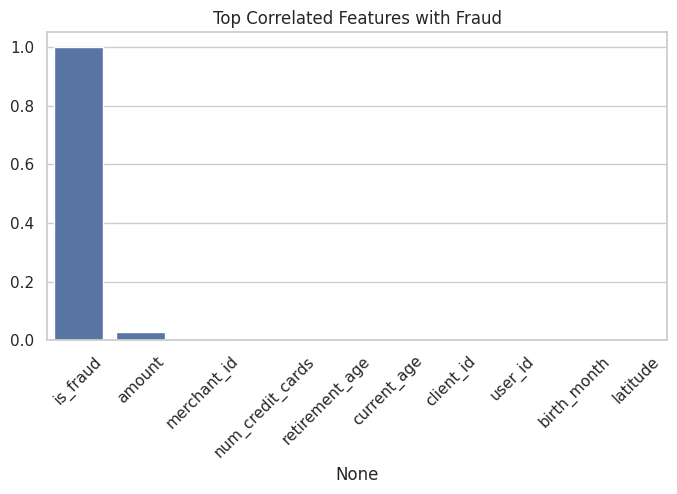

In [55]:
plt.figure(figsize=(8,4))
sns.barplot(x=corr.index[:10], y=corr.values[:10])
plt.title("Top Correlated Features with Fraud")
plt.xticks(rotation=45)
plt.show()